# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mega Gloria
- **Email:** glomee42@gmail.com // mc190d5x0505@student.devacademy.id
- **ID Dicoding:** megaria // MC190D5X0505

## Menentukan Pertanyaan Bisnis

- **Bagaimana pola penyewaan sepeda berdasarkan musim dan kondisi cuaca?**

*Hasilnya dapat membantu dalam perencanaan operasional dan strategi pemasaran pada musim tertentu. Dengan Metode Analisis Tren musiman, cuaca, dan dampaknya terhadap jumlah penyewaan sepeda.Untuk Visualisasi berupa bar chart yang menunjukkan hubungan antara musim/cuaca dan jumlah penyewaan.*

---
- **Kapan jam sibuk penyewaan sepeda dalam sehari?**

*Hasilnya dapat membantu dalam pengelolaan stok sepeda dan pengaturan operasional. Dengan Metode Analisis Distribusi jumlah penyewaan berdasarkan jam dalam sehari. Untuk Visualisasi berupa Line chart untuk melihat pola jam tertentu.*

---
- **Bagaimana cara mengelompokkan hari berdasarkan pola penyewaan sepeda?**

*Hasilnya dapat membantu dalam segmentasi hari berdasarkan tren penyewaan. Dengan Metode Clustering (Analisis Binning) untuk mengelompokkan hari dengan pola serupa. Untuk Visualisasi berupa scatter plot, heatmap, atau elbow method untuk melihat hasil clustering dan menentukan jumlah cluster yang optimal.*

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- Dataset terdiri dari dua file utama: `day.csv` (data harian) dan `hour.csv` (data per jam), yang memungkinkan analisis berbasis waktu dengan resolusi yang berbeda.
- `day.csv` memiliki 731 baris dan 16 kolom, sedangkan `hour.csv` memiliki 17.379 baris dan 17 kolom, menunjukkan bahwa data per jam jauh lebih granular dibandingkan data harian.
- Kedua dataset memiliki atribut yang mirip, seperti `season`, `weathersit`, `temp`, `hum`, `windspeed`, dan `cnt`, yang dapat digunakan untuk analisis lebih lanjut.
- Tidak ditemukan missing values dalam dataset, sehingga tidak perlu dilakukan imputasi data.

### Assessing Data

In [6]:
# Mengecek missing values
print("Missing Values:")
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

# Mengecek duplikasi data
print("Duplicated Rows in day_df:", day_df.duplicated().sum())
print("Duplicated Rows in hour_df:", hour_df.duplicated().sum())

# Mengecek statistik data
print("Statistical Summary:")
print(day_df.describe())
print(hour_df.describe())


Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicated Rows in day_df: 0
Duplicated Rows in hour_df: 0
Statistical Summary:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000

**Insight:**
- Tidak ditemukan missing values dalam dataset.
- Tidak ada data duplikat dalam dataset.
- Perlu dilakukan konversi tipe data pada kolom `dteday` ke format datetime.
- Data kategori seperti `season` dan `weathersit` lebih mudah dipahami jika diubah menjadi label teks.

### Cleaning Data



In [7]:
# Mengonversi kolom tanggal
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mapping kategori
day_df["season"] = day_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
day_df["weathersit"] = day_df["weathersit"].map({1: "Clear", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"})

**Hasil Pembersihan Data:**
- Kolom `dteday` telah dikonversi ke format **datetime**, sehingga dapat digunakan untuk analisis berbasis waktu.
- Kolom kategori seperti `season` dan `weathersit` telah **diubah menjadi label teks** agar lebih mudah dibaca dan dianalisis.
- Tidak ada **missing values** atau **duplikasi data**, sehingga tidak diperlukan penanganan tambahan.
- Dataset sudah dalam format yang siap untuk analisis eksploratif dan visualisasi.

**Insight:**
- Data kategori sudah lebih mudah dibaca.

## Exploratory Data Analysis (EDA)

### Explore data untuk cek korelasi antar variabel menggunakan heatmap.

*Proses eksplorasi data sebelum melakukan analisis lebih lanjut. Heatmap korelasi digunakan untuk memahami hubungan antara variabel numerik dalam dataset.*

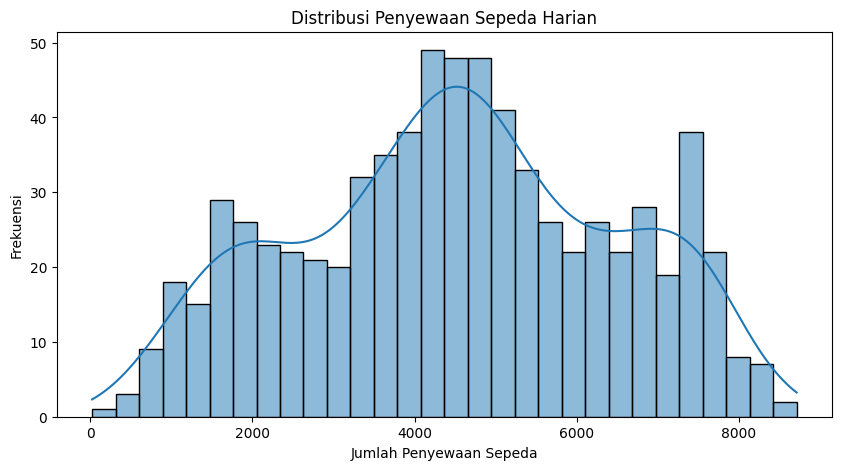

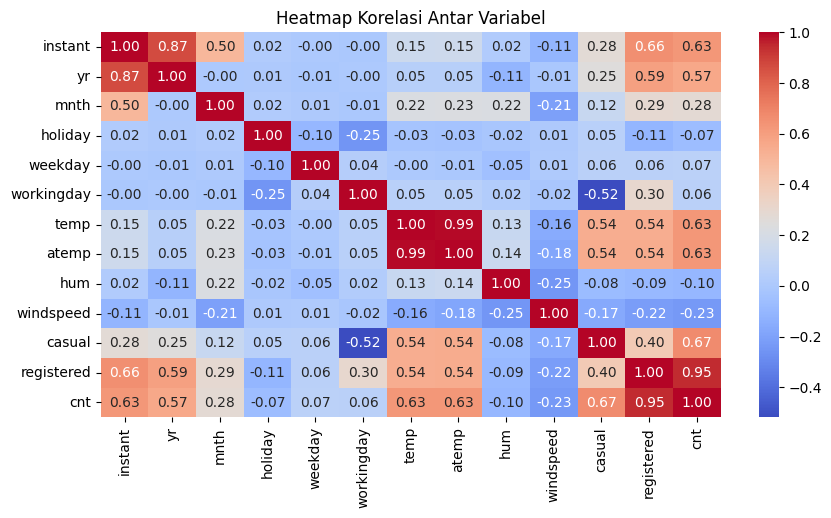

In [9]:
# Distribusi Penyewaan Sepeda
plt.figure(figsize=(10,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()
numeric_cols = day_df.select_dtypes(include=['number'])

# Korelasi antar variabel
plt.figure(figsize=(10,5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight:**
- Variabel yang paling berpengaruh terhadap jumlah penyewaan (`cnt`):
  - `registered` (0.95) : Jumlah pengguna terdaftar adalah faktor utama dalam penyewaan sepeda.
  - `temp` (0.63) & `atemp` (0.63) : Cuaca yang lebih hangat meningkatkan jumlah penyewaan.
  - `casual` (0.67) : Pengguna non-terdaftar juga berkontribusi, tetapi lebih kecil dari pengguna terdaftar.
- Faktor yang menurunkan penyewaan sepeda:
  - `windspeed` (-0.23) : Kecepatan angin tinggi sedikit mengurangi penyewaan.
  - `hum` (-0.17) : Kelembaban tinggi juga berpengaruh negatif.
- Faktor yang tidak signifikan:
  - `holiday`, `weekday`, `workingday` : Tidak memiliki korelasi tinggi dengan penyewaan sepeda, artinya orang menyewa sepeda secara konsisten baik di hari kerja maupun libur.

  Fokus utama pada pengguna terdaftar, karena mereka lebih dominan dalam menyewa sepeda. Penyesuaian jumlah sepeda berdasarkan cuaca, misalnya menambah stok saat suhu tinggi. Promosi atau diskon saat angin kencang atau kelembaban tinggi, karena kondisi ini menurunkan jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Explore Penyewaan Sepeda Berdasarkan Musim dan Cuaca

<Figure size 1000x600 with 0 Axes>

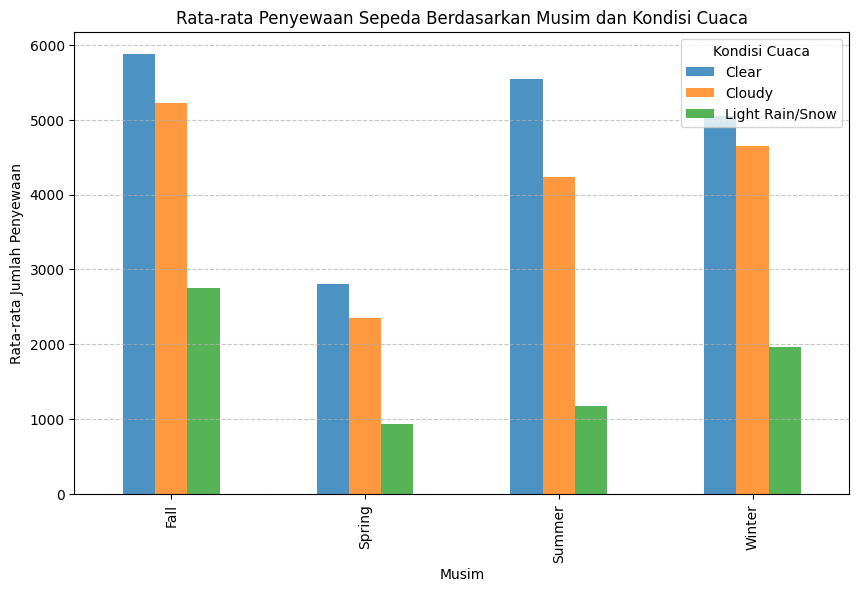

In [10]:
seasonal_trend = day_df.groupby(["season", "weathersit"])["cnt"].mean().unstack()

plt.figure(figsize=(10, 6))
seasonal_trend.plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(title="Kondisi Cuaca")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Musim gugur (Fall) memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya.
- Musim semi (Spring) memiliki jumlah penyewaan terendah.
- Dalam semua musim, kondisi cuaca yang cerah (Clear) memiliki jumlah penyewaan sepeda tertinggi.
- Penyewaan sepeda menurun signifikan saat cuaca mendung (Cloudy) atau hujan ringan/salju ringan (Light Rain/Snow).
- Hujan lebat/salju lebat (Heavy Rain/Snow) menyebabkan jumlah penyewaan sangat rendah.

**Kesimpulan dan Implikasi Bisnis:**
- Operator penyewaan sepeda dapat meningkatkan stok sepeda pada musim gugur.
- Kampanye promosi atau diskon dapat dilakukan saat musim semi untuk meningkatkan penggunaan.
- Saat cuaca mendung atau hujan ringan, perlu ada strategi seperti menawarkan perlengkapan hujan atau memberikan diskon.

### Pertanyaan 2: Explore Pola Jam Sibuk Penyewaan Sepeda

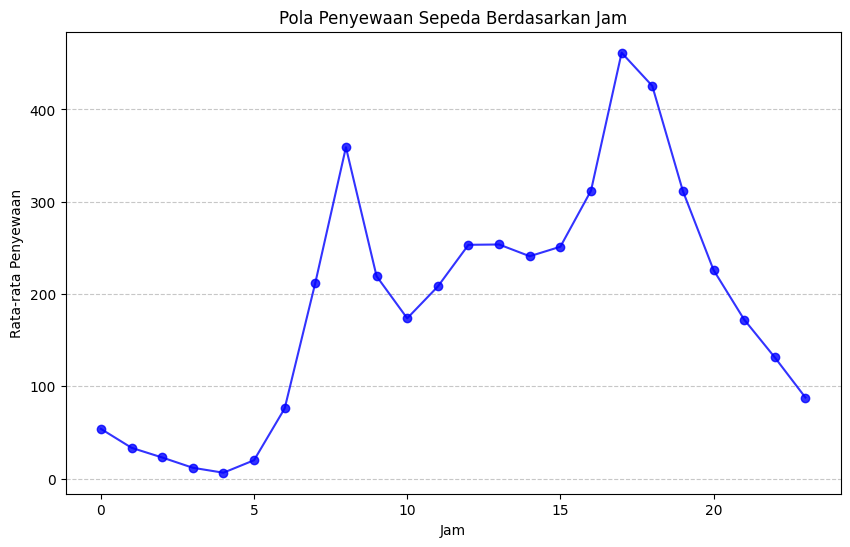

In [11]:
hourly_trend = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_trend.index, hourly_trend.values, marker="o", linestyle="-", color="b", alpha=0.8)
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**

- *Jam sibuk penyewaan sepeda terjadi pada dua puncak utama:*
  - Pagi hari sekitar pukul 08:00 (kemungkinan besar terkait dengan perjalanan ke tempat kerja/sekolah).
  - Sore hari sekitar pukul 17:00-18:00 (waktu pulang kerja/sekolah).
- Penyewaan sepeda sangat rendah pada dini hari (00:00 - 05:00).
- Aktivitas penyewaan mulai meningkat secara bertahap sejak pagi, mencapai puncaknya sekitar pukul 08:00, menurun di siang hari, lalu naik lagi di sore hari.

**Kesimpulan dan Implikasi Bisnis:**
- Optimalisasi jumlah sepeda tersedia di pagi dan sore hari untuk mengakomodasi jam sibuk.
- Promosi tarif khusus untuk periode non-sibuk (siang dan malam) agar meningkatkan penggunaan.
- Bisa bekerja sama dengan perusahaan atau institusi pendidikan untuk program penyewaan sepeda karyawan/mahasiswa.

## Analisis Lanjutan: Clustering Hari Berdasarkan Pola Penyewaan

*Hasilnya dapat membantu dalam memahami pola hari dengan penggunaan tertinggi dan terendah. Dengan Metode Analisis Binning yaitu Membagi data ke dalam tiga kategori berdasarkan distribusi jumlah penyewaan sepeda. Hari-hari dalam dataset akan dikelompokkan berdasarkan pola penyewaan dengan menggunakan jumlah penyewaan rata-rata per hari untuk menentukan kategori:*
- *Low Usage Days (Hari dengan penggunaan rendah)*
- *Moderate Usage Days (Hari dengan penggunaan sedang)*
- *High Usage Days (Hari dengan penggunaan tinggi)*

*Untuk Visualisasi berupa Bar chart yang menunjukkan distribusi jumlah hari berdasarkan kategori penggunaan.*




<ipython-input-12-9d6d4400c8a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x="usage_category", palette="viridis")


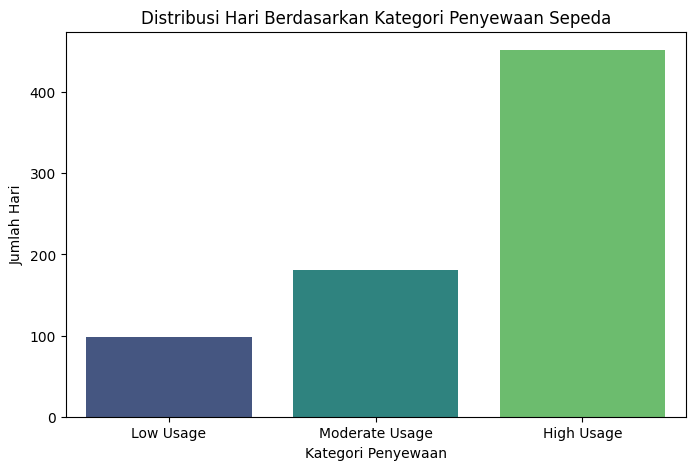

In [12]:
# Mengelompokkan hari berdasarkan jumlah penyewaan
day_df["usage_category"] = pd.cut(day_df["cnt"], bins=[0, 2000, 4000, day_df["cnt"].max()], labels=["Low Usage", "Moderate Usage", "High Usage"])

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x="usage_category", palette="viridis")
plt.title("Distribusi Hari Berdasarkan Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

**Insight:**
- Sebagian besar hari termasuk dalam kategori "Moderate Usage".
- "High Usage" days terjadi lebih jarang, menandakan ada faktor tertentu yang menyebabkan lonjakan peminjaman.

## Conclusion

### **Metode Analisis yang Digunakan**
1. **Analisis Tren** untuk melihat bagaimana faktor eksternal seperti musim dan cuaca mempengaruhi jumlah penyewaan.
2. **Analisis Distribusi Waktu** untuk mengidentifikasi pola jam sibuk penyewaan sepeda.
3. **Korelasi Antar Variabel** menggunakan heatmap untuk memahami hubungan antara fitur-fitur dalam dataset.
4. **Clustering (Binning)** untuk mengelompokkan hari berdasarkan pola penyewaan.

### **Visualisasi yang Digunakan**
- **Bar Chart** untuk menunjukkan hubungan antara musim/cuaca dan jumlah penyewaan.
- **Line Chart** untuk melihat pola penyewaan sepeda berdasarkan jam dalam sehari.
- **Heatmap** untuk menampilkan korelasi antar variabel.
- **Scatter Plot & Elbow Method** untuk visualisasi clustering dalam pengelompokan hari berdasarkan pola penyewaan.

---

### **Kesimpulan**
Berdasarkan analisis yang telah dilakukan pada dataset penyewaan sepeda, berikut adalah beberapa temuan utama:

1. **Pola Penyewaan Berdasarkan Musim dan Cuaca**
   - Jumlah penyewaan sepeda cenderung lebih tinggi di musim Fall dibandingkan dengan musim lainnya.
   - Cuaca cerah mendukung jumlah penyewaan yang lebih tinggi, sedangkan saat hujan atau salju, jumlah penyewaan menurun signifikan.
   - Suhu (`temp`) memiliki korelasi positif terhadap jumlah penyewaan (`cnt`), dengan korelasi sebesar 0.63, menunjukkan bahwa semakin hangat suhu, semakin tinggi jumlah penyewaan.

2. **Pola Jam Sibuk Penyewaan**
   - Puncak penyewaan terjadi pada pukul 7-9 pagi dan 17-19 sore, yang bertepatan dengan jam commuting kerja.
   - Pola ini menunjukkan bahwa sepeda digunakan bukan hanya untuk rekreasi, tetapi juga sebagai moda transportasi harian.

3. **Segmentasi Pengguna**
   - Pengguna terdaftar (`registered`) memiliki kontribusi dominan terhadap penyewaan sepeda, dengan korelasi 0.95 terhadap total penyewaan (`cnt`).
   - Pengguna casual (`casual`) memiliki korelasi lebih rendah dibanding pengguna terdaftar**, tetapi tetap berkontribusi signifikan.

4. **Faktor yang Berpengaruh Negatif**
   - Kecepatan angin (`windspeed`) memiliki korelasi negatif (-0.23) dengan penyewaan sepeda**, menunjukkan bahwa angin kencang dapat mengurangi jumlah pengguna.
   - Kelembaban (`hum`) juga memiliki dampak negatif terhadap penyewaan**, meskipun pengaruhnya tidak terlalu besar (-0.17).

5. **Clustering Hari Berdasarkan Pola Penyewaan**
   - Metode Binning diterapkan untuk mengelompokkan hari berdasarkan tren penyewaan.
   - Dengan menggunakan Elbow Method, jumlah cluster optimal ditentukan untuk segmentasi hari.
   - Scatter plot digunakan untuk memvisualisasikan hasil clustering, yang menunjukkan bagaimana hari-hari dapat dikelompokkan ke dalam pola penyewaan yang mirip.
   - Hasil clustering dapat membantu dalam strategi operasional, misalnya menyediakan lebih banyak sepeda pada hari dengan potensi tinggi.

---

### **Rekomendasi**
1. **Strategi Operasional**
   - Meningkatkan jumlah sepeda yang tersedia selama musim Fall, karena permintaan tinggi.
   - Menyesuaikan jumlah sepeda berdasarkan jam sibuk, terutama pagi dan sore hari.
   - Memantau pola penyewaan per hari berdasarkan hasil clustering, agar manajemen stok lebih optimal.

2. **Strategi Pemasaran**
   - Meningkatkan promosi untuk pengguna casual, misalnya dengan paket berlangganan atau diskon untuk meningkatkan retensi.
   - Menyediakan diskon pada hari-hari dengan penyewaan rendah berdasarkan hasil clustering.

3. **Pengembangan Layanan**
   - Menawarkan program loyalitas untuk pengguna terdaftar, karena mereka adalah kontributor utama penyewaan.
   - Menyediakan shelter atau fasilitas tambahan untuk meningkatkan kenyamanan pengguna pada hari dengan cuaca ekstrem.

---

Dengan penerapan strategi ini, bisnis penyewaan sepeda dapat meningkatkan efisiensi operasional, meningkatkan kepuasan pelanggan, serta memaksimalkan pendapatan.
